## Football Analysis Notebook:
An project to explore and analyse a set of all men's senior international football results from 1872 up to 2024.
<br>
Data taken from https://www.kaggle.com/datasets/martj42/international-football-results-from-1872-to-2017/data

In [71]:
# Import libraries
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt

In [49]:
# Load dataframes
goalscorers = pd.read_csv('goalscorers.csv')
results = pd.read_csv('results.csv')
shootouts = pd.read_csv('shootouts.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [17]:
# exploratory analysis
gRow, gCol = goalscorers.shape
rRow, rCol = results.shape
sRow, sCol = shootouts.shape
print(f"the goalscorers dataframe has {gRow} rows and {gCol} columns")
print(f"The goalscores dataframe column names are:\n",list(goalscorers))
print(f"\nthe results dataframe has {rRow} rows and {rCol} columns")
print(f"The results dataframe column names are:\n",list(results))
print(f"\nthe shootouts dataframe has {sRow} rows and {sCol} columns")
print(f"The shootouts dataframe column names are:\n",list(shootouts))

the goalscorers dataframe has 44362 rows and 8 columns
The goalscores dataframe column names are:
 ['date', 'home_team', 'away_team', 'team', 'scorer', 'minute', 'own_goal', 'penalty']

the results dataframe has 47598 rows and 9 columns
The results dataframe column names are:
 ['date', 'home_team', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral']

the shootouts dataframe has 645 rows and 5 columns
The shootouts dataframe column names are:
 ['date', 'home_team', 'away_team', 'winner', 'first_shooter']


# First analysis
Firstly, I would like to visualise how the average number of goals scored per game has changed over time.
<br>I will use the results dataframe to find the average number of goals scored per game for each year, and plot this data

In [79]:
# create dataframe with two columns, 'year' and 'average goals per game'

# create new columns in results dataframe, year and total_goals
results['total_goals'] = results['home_score'] + results['away_score']

def year_from_date (date):
    date = pd.to_datetime(date)
    return date.dt.year

results['year'] = year_from_date(results['date'])

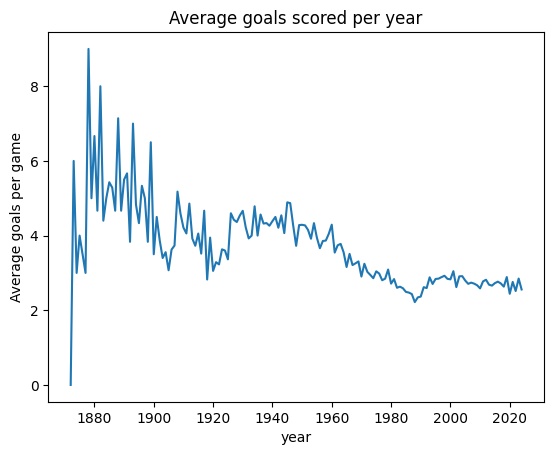

In [80]:
# group matches together by year, and calculate the average number fo goals per match by year

avg_goals_per_year = results.groupby('year')['total_goals'].mean()

plt.figure()
avg_goals_per_year.plot(kind='line')
plt.title('Average goals scored per year')
plt.xlabel('year')
plt.ylabel('Average goals per game')
plt.show()